In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
defect_dict = load_tensors_all('./defect_tensors_D10_1/W2BRFRF/', width=128)

(53, 63, 65)
(8, 63, 65)
(11, 86, 75)
(2, 86, 75)


In [4]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 74
number of class 0: 64
	number of SN: 10
number of class 10: 10
	number of SN: 2


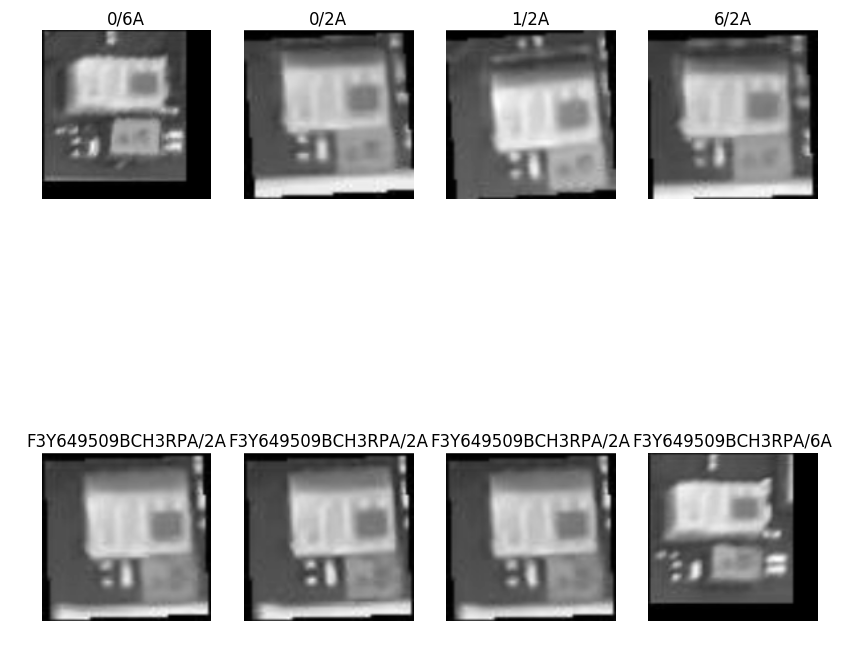

In [6]:
display_tensor(tensors, labels, sns)

In [7]:
from defectlib import GroupKFold_modeling

In [8]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=11, nb_epoch=20, input_shape=(128, 128))

Model 1
the label of validation image: 0
the s/n of validation image: 4
Train on 66 samples, validate on 8 samples
Epoch 1/20
66/66 [==============================] - 2s - loss: 2.0402 - acc: 0.4394 - val_loss: 0.1332 - val_acc: 1.0000
Epoch 2/20
66/66 [==============================] - 2s - loss: 0.5783 - acc: 0.8485 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 3/20
66/66 [==============================] - 2s - loss: 0.9367 - acc: 0.7879 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 4/20
66/66 [==============================] - 2s - loss: 0.6594 - acc: 0.8485 - val_loss: 0.1493 - val_acc: 1.0000
Epoch 5/20
66/66 [==============================] - 2s - loss: 0.5490 - acc: 0.8333 - val_loss: 0.9555 - val_acc: 0.0000e+00
Epoch 6/20
66/66 [==============================] - 2s - loss: 0.8139 - acc: 0.5606 - val_loss: 0.0437 - val_acc: 1.0000
Epoch 7/20
66/66 [==============================] - 2s - loss: 0.6143 - acc: 0.8485 - val_loss: 0.0580 - val_acc: 1.0000
Epoch 8/20
66/66 [================

In [10]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '4', 1.0, 1.0),
 (0, '0', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '1', 0.2857142857142857, 0.2857142857142857),
 (0, '8', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '9', 0.80000000000000004, 0.8),
 (0, '3', 1.0, 1.0),
 (0, '2', 1.0, 1.0),
 (10, 'F3Y649509BCH3RPA', 0.0, 1.0),
 (10, 'F3Y64940NLLGY4TA', 0.0, 1.0)]